<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### 1. Read in the Sacramento housing data set.

In [2]:
shd = pd.read_csv('../../../../resource-datasets/sacramento_real_estate/Sacramentorealestatetransactions.csv')
shd.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [17]:
# A:
shd.describe(include='all')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
count,985,985,985.000000,985,985.000000,985.000000,985.000000,985,985,985.000000,985.000000,985.000000
unique,981,39,NaN,1,NaN,NaN,NaN,4,5,NaN,NaN,NaN
top,8306 CURLEW CT,SACRAMENTO,NaN,CA,NaN,NaN,NaN,Residential,Mon May 19 00:00:00 EDT 2008,NaN,NaN,NaN
freq,2,439,NaN,985,NaN,NaN,NaN,917,268,NaN,NaN,NaN
mean,NaN,NaN,95750.697462,NaN,2.911675,1.776650,1314.916751,NaN,NaN,234144.263959,38.607732,-121.355982
std,NaN,NaN,85.176072,NaN,1.307932,0.895371,853.048243,NaN,NaN,138365.839085,0.145433,0.138278
min,NaN,NaN,95603.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,1551.000000,38.241514,-121.551704
25%,NaN,NaN,95660.000000,NaN,2.000000,1.000000,952.000000,NaN,NaN,145000.000000,38.482717,-121.446127
50%,NaN,NaN,95762.000000,NaN,3.000000,2.000000,1304.000000,NaN,NaN,213750.000000,38.626582,-121.376220
75%,NaN,NaN,95828.000000,NaN,4.000000,2.000000,1718.000000,NaN,NaN,300000.000000,38.695589,-121.295778


In [19]:
shd.sort_values('sq__ft')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
492,2513 OLD KENMARE RD,LINCOLN,95648,CA,5,3,0,Residential,Mon May 19 00:00:00 EDT 2008,304000,38.847396,-121.259586
559,40 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884535,-121.289619
558,36 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884599,-121.289406
557,32 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884741,-121.289390
556,28 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884936,-121.289397
555,24 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885132,-121.289405
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
554,20 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885327,-121.289412
545,1732 TUSCAN GROVE CIR,ROSEVILLE,95747,CA,5,3,0,Residential,Mon May 19 00:00:00 EDT 2008,520000,38.796683,-121.342555
544,408 KIRKWOOD CT,LINCOLN,95648,CA,2,2,0,Residential,Mon May 19 00:00:00 EDT 2008,512000,38.861615,-121.268690


### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

In [22]:
# A:

shd.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


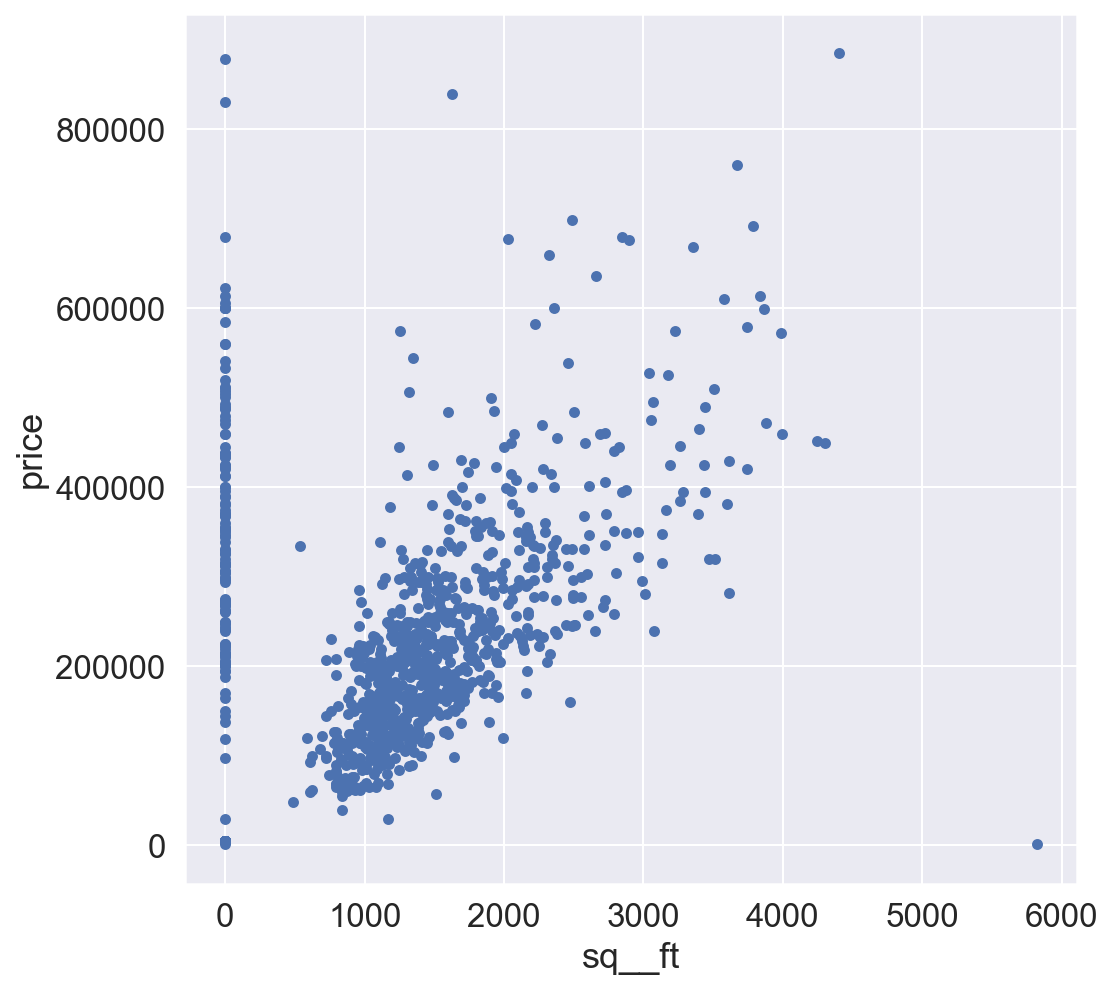

In [31]:
shd.plot.scatter(x='sq__ft',y='price',figsize=(8, 8),layout=(10,5));

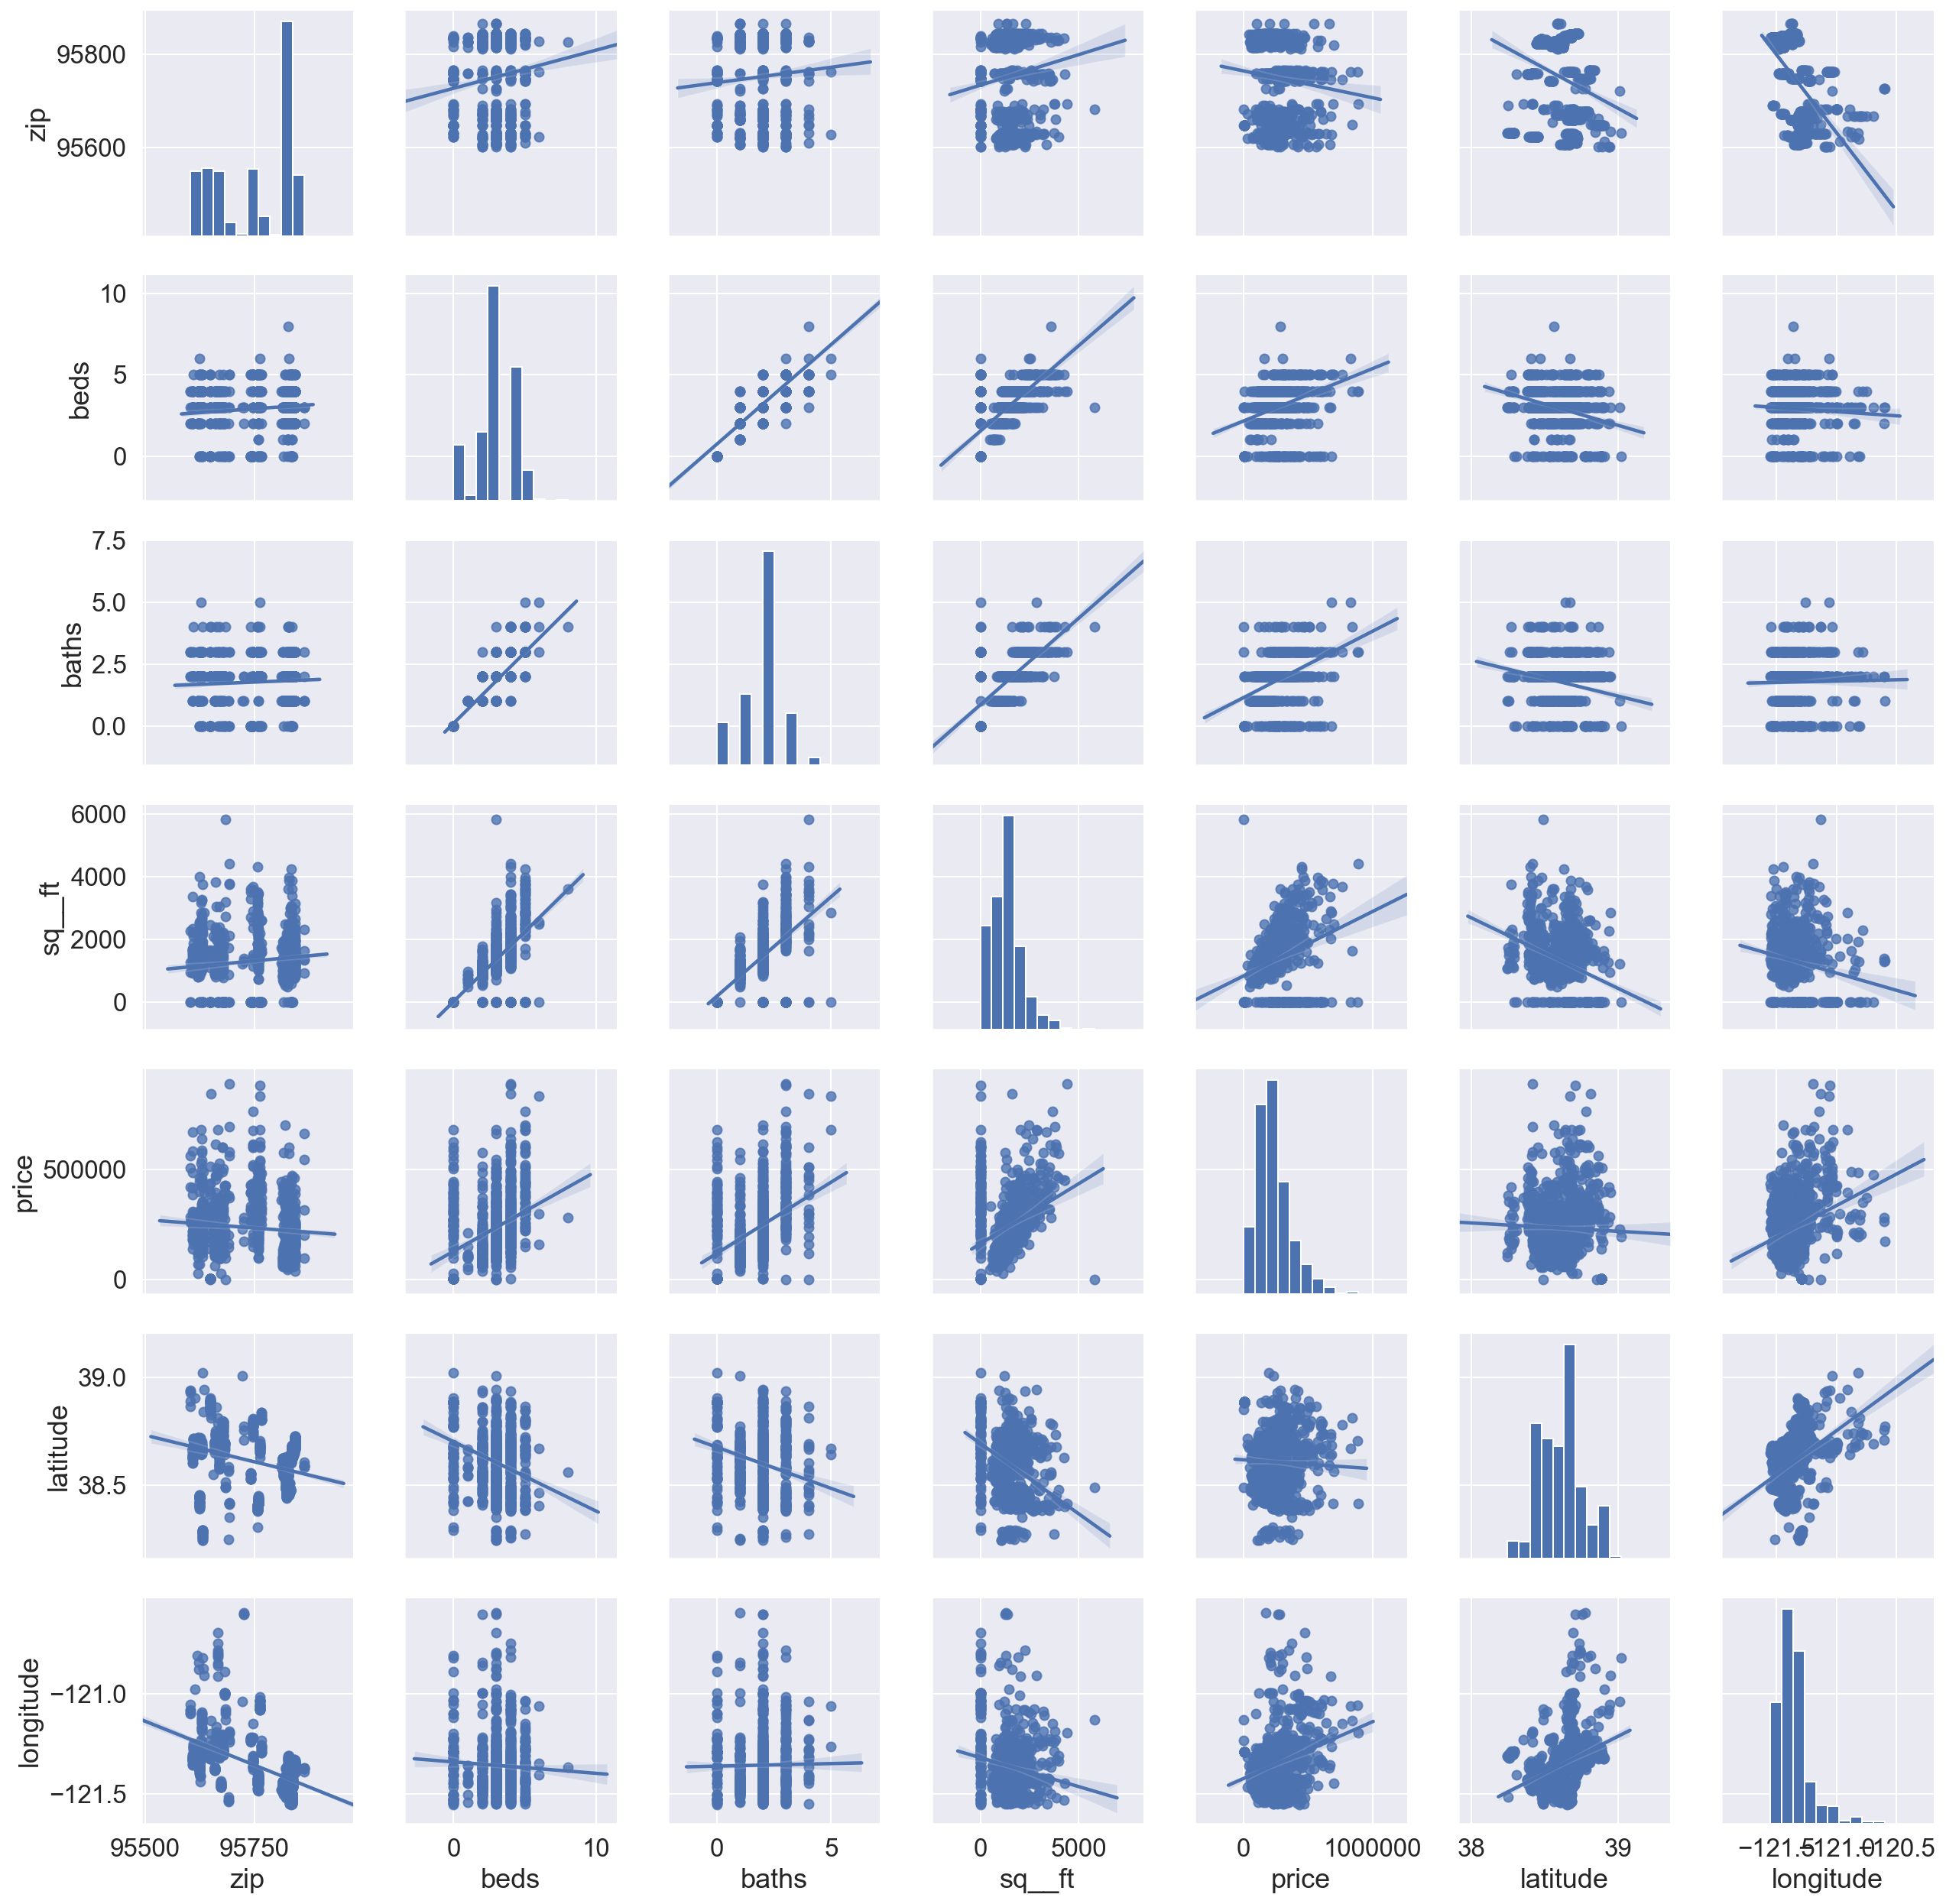

In [29]:
sns.pairplot(shd,kind='reg');

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [5]:
# A: sq__ft: is continuous variable, which plots well with price, the other variables have no real relationship.

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [43]:
import numpy as np
import scipy.stats

# Get the optimal Slope and y intercept

def sls_fit_pd(df, X, Y):
    '''Takes a dataframe and the column names 
    refering to predictor and target variable,
    returns the regression coefficients beta_0 and beta_1.'''
    y_bar = df[Y].mean()
    x_bar = df[X].mean()
    std_y = df[Y].std()
    std_x = df[X].std()
    r_xy = df.corr().loc[X, Y]
    beta_1 = r_xy*(std_y/std_x)
    beta_0 = y_bar - beta_1*x_bar
    return beta_0, beta_1

In [69]:
# A:
# Note: zero sq_ft datapoints will muddy the prediction, I will remove those

shd_sqft = shd[shd['sq__ft'] > 0]

beta_1 = sls_fit_pd(shd_sqft,'sq__ft','price')[1]
beta_0 = sls_fit_pd(shd_sqft,'sq__ft','price')[0]

sls_fit_pd(shd_sqft,'sq__ft','price')

(30210.633866919117, 125.21648667984451)

### 6. Interpret the intercept. Interpret the slope.

In [8]:
# A:
# Intercept: at 0sqft, price will be 30,210dollars
# Slope: for every sqft increase in property size, there will be a 125 dollar increase in price

### 7: [Bonus] Using the model you came up with in Problem 5, do the following.

- Plot a histogram of the residuals and judge the distribution.
- Plot price versus your predictor in a scatter plot combined with the regression line and vertical lines for the residuals.
- Plot the true values of price versus the predicted values.

In [70]:
shd_sqft['predict'] = (beta_0 + (beta_1*shd_sqft.sq__ft)).round()
shd_sqft

/Users/Noah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,predict
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,134892.0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,176338.0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,129883.0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,136895.0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,130008.0
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,170704.0
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705,168450.0
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367,177590.0
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555,148039.0
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979,173709.0


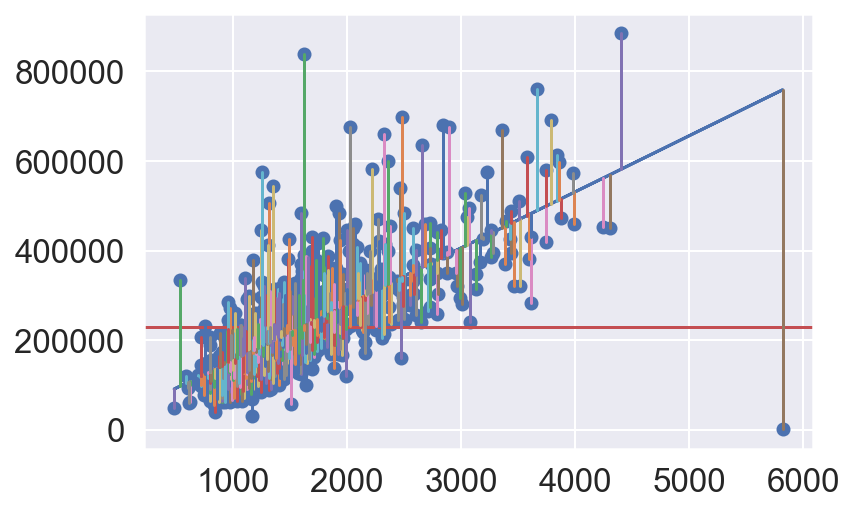

In [72]:
# A:
plt.scatter(x=shd_sqft.sq__ft,y=shd_sqft.price);
plt.axhline(y=shd_sqft.price.mean(), color='r', linestyle='-');
plt.plot(shd_sqft.sq__ft,shd_sqft.predict);
plt.plot([shd_sqft.sq__ft,shd_sqft.sq__ft],[shd_sqft.price,shd_sqft.predict],'-');

In [ ]:
# you can plot price vs pred and points should be tight along a 45deg line